In [8]:
!pip install pytorch-lightning

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/815.2 kB ? eta -:--:--
   - -------------------------------------- 30.7/815.2 kB 1.3 MB/s eta 0:00:01
   - -------------------------------------- 30.7/815.2 kB 1.3 MB/s eta 0:00:01
   -- ------------------------------------ 61.4/815.2 kB 409.6 kB/s eta 0:00:02
   -- ------------------------------------ 61.4/815.2 kB 409.6 kB/s eta 0:00:02
   ----- -------------------------------- 112.6/815.2 kB 467.6 kB/s eta 0:00:02
   ------ ------------------------------- 143.4/815.2 kB 532.5 kB/s eta 0:00:02
   ---------- --------------------------- 225.3/815.2 kB 687.0 kB/s eta 0:00:01
   ------------ ------------------------- 276.5/815.2 kB 739.6 kB/s eta 0:00:01
   --------------- ---------------------- 337.9/815.2 kB 838.1 kB/s eta 0:00:01
   ----------------------- ---------------- 471.0/815.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 583.7/815.2 kB

In [9]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

In [10]:
DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.backends.mps.is_built() or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

Using device: cpu


In [11]:
tokenizer = CLIPTokenizer("E:/Data Science/Stable Diffusion/data/vocab.json", merges_file="E:/Data Science/Stable Diffusion/data/merges.txt")
model_file = "E:/Data Science/Stable Diffusion/data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

c:\Users\harsh\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [12]:
## TEXT TO IMAGE

# Prompt = "A Dog Wearing Glass"
prompt = "A Happy Dog Wearing Stylish Glass"
uncond_prompt = "" # Also known as negative prompt
do_cfg = True
cfg_scale = 8 # min: 1, max: 14

In [13]:
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "E:/Data Science/Stable Diffusion/images/dog.jpg"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

100%|██████████| 50/50 [35:52<00:00, 43.04s/it]  


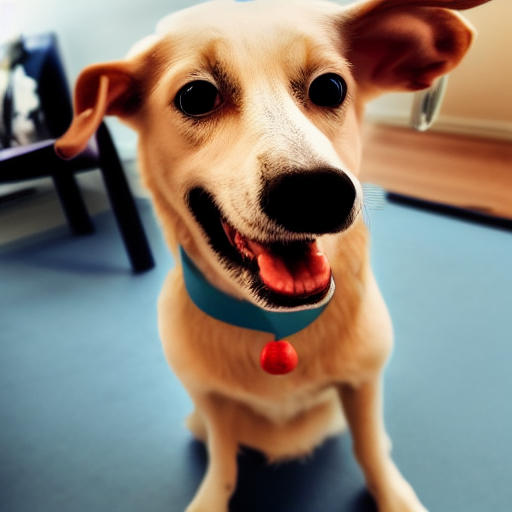

In [14]:
## SAMPLER
sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)